<a href="https://colab.research.google.com/github/Aleksandr62aa/ML_DL/blob/main/CNN_LeNet5_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification of handwritten numbers by convolution
    neural network**

**Dataset MNIST**

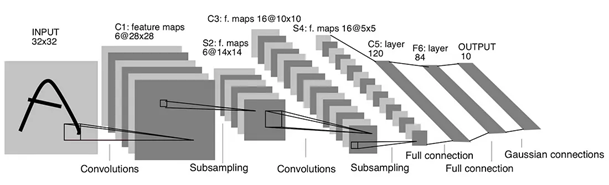

**Figure**

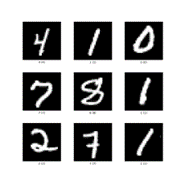

**LeNet5:**

**Conv 5x5** --> **2 Conv 3x3**.

**Tanh** --> **ReLu**.

**Average Pooling**  --> **Max Pooling**.

**BatchNorm**

**Importing libraries**

In [1]:
import torch
import random
import numpy as np
import torchvision.transforms as transforms
import torchvision.datasets
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor
from PIL import Image

# Fixed seed
random.seed(1)
np.random.seed(1)
torch.manual_seed(1)
torch.cuda.manual_seed(1)
torch.backends.cudnn.deterministic = True

In [2]:
# Hyperparameters
batch_size = 100
learning_rate = 1.0e-3
num_epochs = 6

In [3]:
# GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

**Train Test dataset**

In [4]:
train_MNIST = torchvision.datasets.MNIST('./', download=True, train=True, transform=ToTensor())
test_MNIST = torchvision.datasets.MNIST('./', download=True, train=False, transform=ToTensor())

train_dataloader_MNIST = torch.utils.data.DataLoader(
    train_MNIST, batch_size=batch_size, shuffle=True, num_workers=batch_size)

test_dataloader_MNIST = torch.utils.data.DataLoader(
    test_MNIST, batch_size=len(test_MNIST), shuffle=True, num_workers=batch_size)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 100 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [5]:
len(train_MNIST), len(train_dataloader_MNIST)

(60000, 600)

**Image**

In [6]:
def image_plot(x):
  plt.imshow(x.permute(1, 2, 0), cmap='gray')

tensor(4)


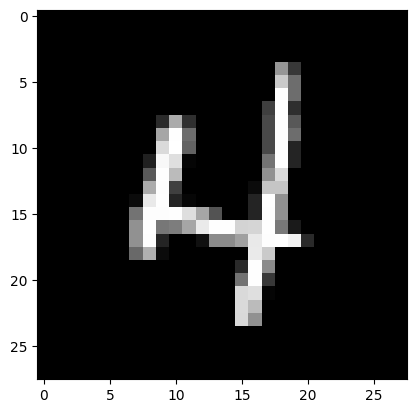

In [7]:
X_batch, y_batch = next(iter(train_dataloader_MNIST))
image_plot(X_batch[0])
print (y_batch[0].data)

**Model CNN**

In [8]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.model = torch.nn.Sequential(
          # conv1
          torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, padding=1),
          torch.nn.Conv2d(in_channels=6, out_channels=6, kernel_size=3, padding=1),
          torch.nn.ReLU(),
          #torch.nn.BatchNorm2d(num_features=6),
          torch.nn.MaxPool2d(kernel_size=2, stride=2),
          # conv2
          torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, padding=0),
          torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=0),
          torch.nn.ReLU(),
          torch.nn.BatchNorm2d(num_features=16),
          torch.nn.AvgPool2d(kernel_size=2, stride=2),
          # conv3
          torch.nn.Flatten(),
          # FC1
          torch.nn.Linear(5 * 5 * 16, 120),
          torch.nn.ReLU(),
          # torch.nn.BatchNorm1d(num_features=120),
          # FC2
          torch.nn.Linear(120, 84),
          torch.nn.Sigmoid(),
          # torch.nn.BatchNorm1d(num_features=84),
          torch.nn.Linear(84, 10)
        )

    def forward(self, x):
        return self.model(x)

model = LeNet5().to(device)

**Loss function**

In [9]:
loss_fn = torch.nn.CrossEntropyLoss()

**Optimizer**

In [10]:
optimizer = torch.optim.Adam(model .parameters(), lr=learning_rate)

**Training procedure**

In [11]:
test_accuracy_history = []
test_loss_history = []

X_test, y_test = next(iter(test_dataloader_MNIST))
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(num_epochs):
  for batch in train_dataloader_MNIST:
      optimizer.zero_grad()
      X_batch, y_batch = batch

      X_batch = X_batch.to(device)
      y_batch = y_batch.to(device)

      y_preds = model(X_batch) ##

      loss_train = loss_fn(y_preds, y_batch)

      loss_train.backward()
      optimizer.step()

  y_preds = model(X_test)

  loss_test = loss_fn(y_preds, y_test).cpu()
  test_loss_history.append(loss_test.item())

  accuracy = (y_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
  test_accuracy_history.append(accuracy)

  print(f"Epoch:{epoch} loss_train is {loss_train.item()}")
  print(f"accuracy_test:{accuracy} loss_test is {loss_test.item()}")

Epoch:0 loss_train is 0.06927230954170227
accuracy_test:0.9805999994277954 loss_test is 0.06950654834508896
Epoch:1 loss_train is 0.0498788058757782
accuracy_test:0.986799955368042 loss_test is 0.04882323741912842
Epoch:2 loss_train is 0.05739220231771469
accuracy_test:0.9860999584197998 loss_test is 0.04618211090564728
Epoch:3 loss_train is 0.024505002424120903
accuracy_test:0.9894999861717224 loss_test is 0.03756303712725639
Epoch:4 loss_train is 0.014785733073949814
accuracy_test:0.9914000034332275 loss_test is 0.02998615801334381
Epoch:5 loss_train is 0.025941679254174232
accuracy_test:0.9910999536514282 loss_test is 0.03101295232772827


**Result test**

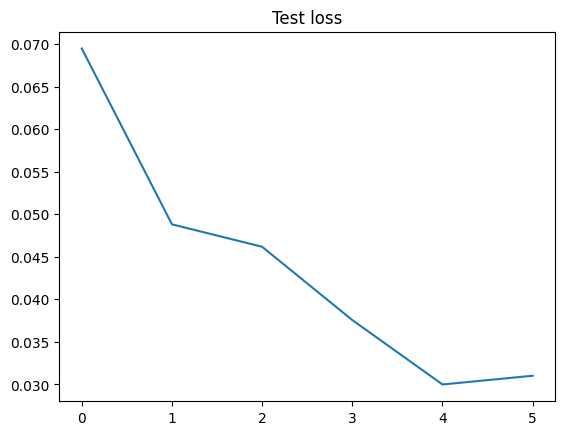

In [12]:
plt.plot(test_loss_history)
plt.title('Test loss');

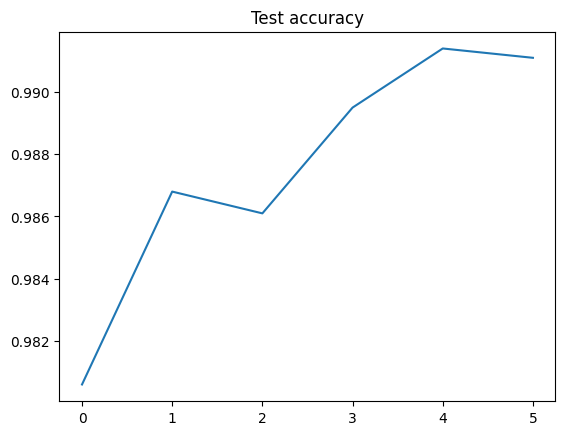

In [13]:
plt.plot(test_accuracy_history)
plt.title('Test accuracy');